In [11]:

import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
from torch import nn
from torch.nn import functional as F
import pandas as pd

In [13]:

x_np = np.random.normal(0,1,10000)
x_np.sort()
x_np = np.append(x_np,[5.9,6,8])

In [13]:
a,b = 2,-1
y = a*x_np+b

output stats
     count      mean       std        min       25%      50%      75%   max
0  10003.0 -1.005059  1.998993 -10.306591 -2.346007 -1.00657  0.33788  15.0


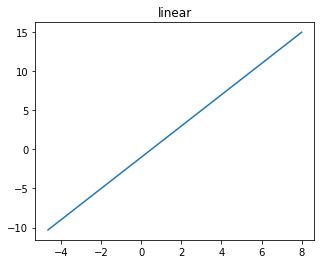

In [14]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.title('linear')
plt.plot(x_np,y)
print('output stats')
print(pd.Series(y).describe().to_frame().T)

In [15]:
a2,b2 = 0.1,3

In [16]:
y = a2*y+b2

output stats
     count      mean       std       min       25%       50%       75%  max
0  10003.0  2.899494  0.199899  1.969341  2.765399  2.899343  3.033788  4.5


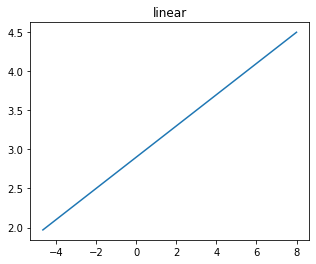

In [16]:
plt.rcParams['figure.figsize'] = [5, 4]
plt.title('linear')
plt.plot(x_np,y)
print('output stats')
print(pd.Series(y).describe().to_frame().T)

In [17]:
plt.rcParams['figure.figsize'] = [10, 4]

In [18]:
def ToNumpy(x):
    return x.detach().numpy()
def Plot(x,y,title=''):  
    x = ToNumpy(x)
    y = ToNumpy(y)
    ax = plt.subplot(1,2,1)
    plt.title(title)
    ax.plot(x,y)
    ax = plt.subplot(1,2,2)
    plt.title('distribution of output')
    ax.hist(y)
    
    print('output stats')
    print(pd.Series(y).describe().to_frame().T)

output stats
     count      mean       std      min       25%       50%       75%  \
0  10003.0  0.499302  0.207867  0.00944  0.337825  0.499179  0.661266   

        max  
0  0.999665  


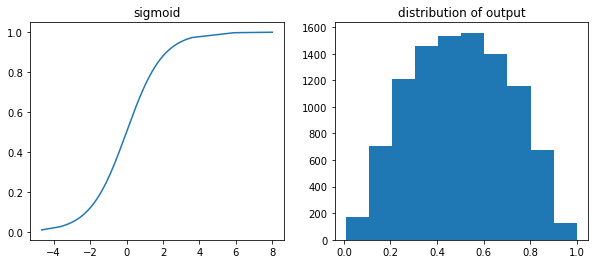

In [19]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)

y = torch.sigmoid(x)

Plot(x,y,'sigmoid')

In [20]:
def PlotWithGrad(x,y,title=''):
    y.sum().backward()
    x_grad = ToNumpy(x.grad)
    x = ToNumpy(x)
    y = ToNumpy(y)
    ax = plt.subplot(1,2,1)
    plt.title(title)
    ax.plot(x,y,label=title)
    
    
    ax.plot(x,x_grad,label='grad')
    ax.legend()
        
    ax = plt.subplot(1,2,2)
    plt.title('distribution of output')
    ax.hist(y)
    
    print('output stats')
    print(pd.Series(y).describe().to_frame().T)

output stats
     count      mean       std      min       25%       50%       75%  \
0  10003.0  0.499302  0.207867  0.00944  0.337825  0.499179  0.661266   

        max  
0  0.999665  


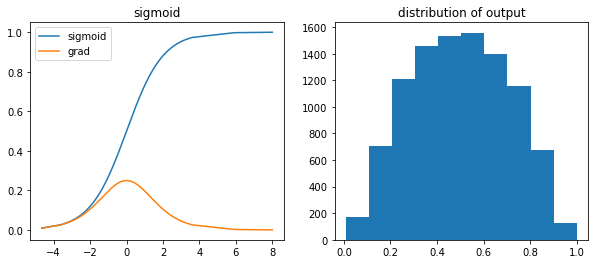

In [21]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = torch.sigmoid(x)
PlotWithGrad(x,y,'sigmoid')

output stats
     count     mean       std       min       25%       50%       75%  max
0  10003.0 -0.00259  0.628112 -0.999818 -0.586952 -0.003285  0.584282  1.0


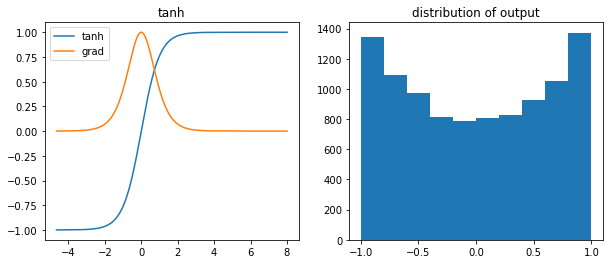

In [22]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = torch.tanh(x)
PlotWithGrad(x,y,'tanh')

output stats
     count      mean       std  min       25%       50%      75%  max
0  10003.0 -0.003216  0.719338 -1.0 -0.673004 -0.003285  0.66894  1.0


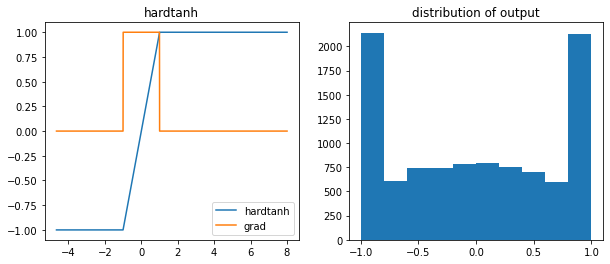

In [23]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = F.hardtanh(x)
PlotWithGrad(x,y,'hardtanh')

output stats
     count      mean       std  min  25%  50%      75%  max
0  10003.0  0.397255  0.586195  0.0  0.0  0.0  0.66894  8.0


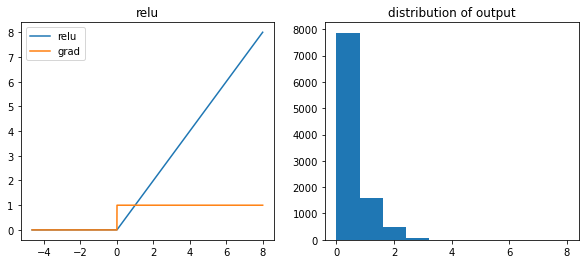

In [24]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = torch.relu(x)
PlotWithGrad(x,y,'relu')

output stats
     count      mean       std      min     25%       50%      75%  max
0  10003.0  0.357276  0.615439 -0.46533 -0.0673 -0.000329  0.66894  8.0


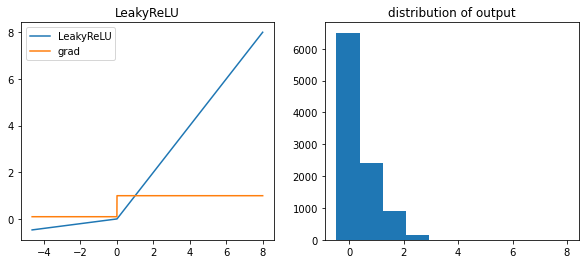

In [28]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = F.leaky_relu(x,0.1)
PlotWithGrad(x,y,'LeakyReLU')

output stats
     count      mean       std       min       25%      50%       75%  max
0  10003.0  0.155531  0.793794 -0.975213 -0.491867 -0.01524  0.649188  8.0


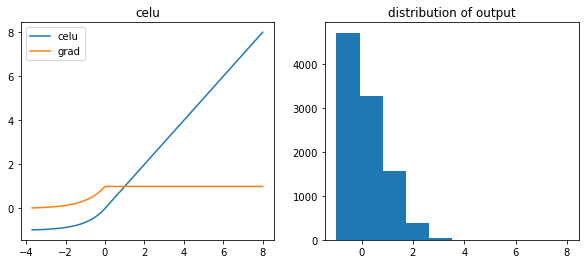

In [120]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = torch.celu(x)
PlotWithGrad(x,y,'celu')

output stats
     count      mean       std  min  25%  50%       75%  max
0  10003.0  0.395198  0.591546  0.0  0.0  0.0  0.649188  6.0


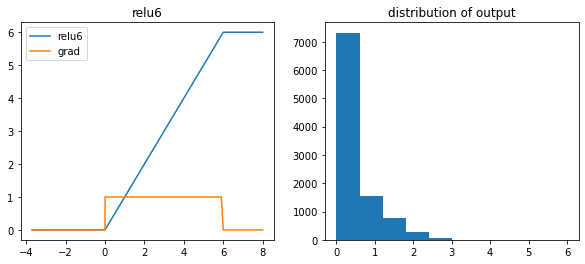

In [121]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = F.relu6(x)
PlotWithGrad(x,y,'relu6')

In [122]:
def Mish( x):
    return x *( torch.tanh(F.softplus(x)))

output stats
     count      mean       std       min       25%       50%       75%  \
0  10003.0  0.236901  0.637836 -0.308843 -0.248909 -0.009139  0.512392   

        max  
0  7.999998  


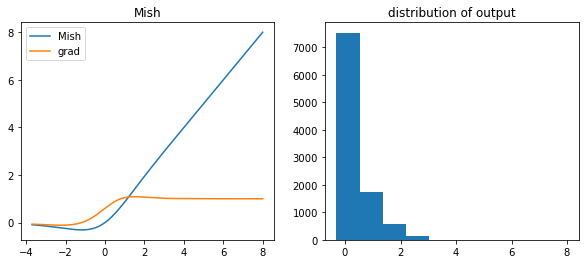

In [123]:
x = Variable(torch.FloatTensor(x_np),requires_grad=True)
y = Mish(x)
PlotWithGrad(x,y,'Mish')